In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["flength","fwidth","fsize","fconc","fconc1","fasym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df['class']=(df['class']=="g").astype(int) # (df['class'] == "g") → This creates a boolean Series: True where the value is "g", False otherwise.

# .astype(int) → Converts True → 1 and False → 0.

# df['class'] = ... → Stores the result back into the 'class' column.

In [ ]:
print(df.columns)
df.columns = df.columns.str.strip() # This removes leading and trailing spaces from all column names.
print(df.head())



Index(['flength', 'fwidth', 'fsize', 'fconc', 'fconc1', 'fasym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')
    flength    fwidth   fsize   fconc  fconc1     fasym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  


/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:895: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


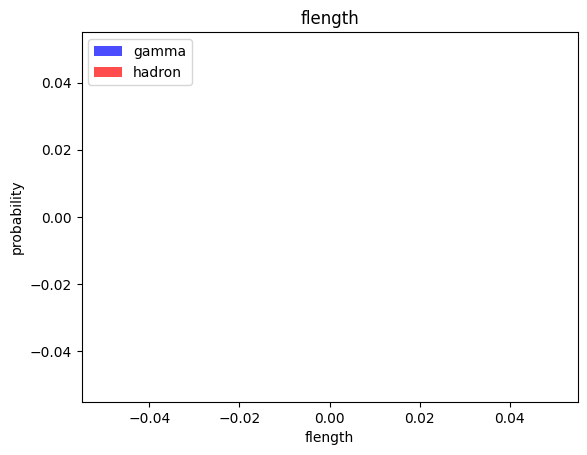

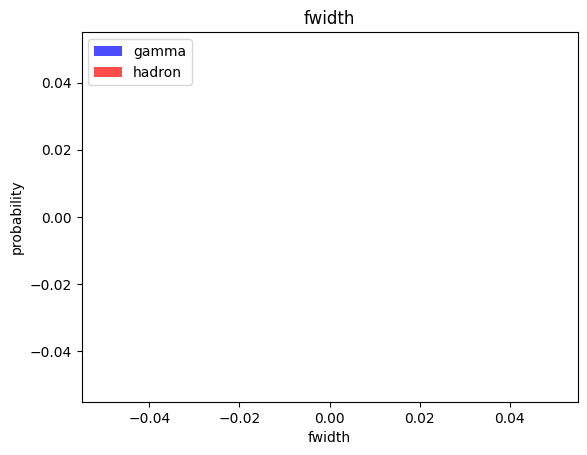

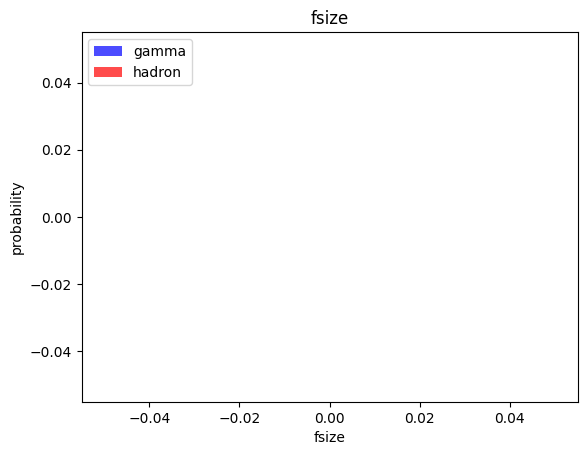

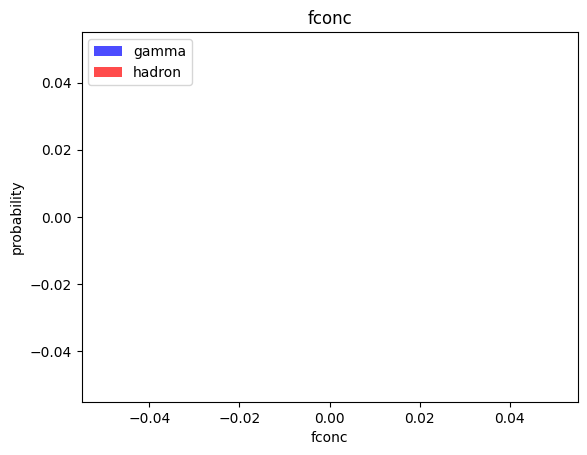

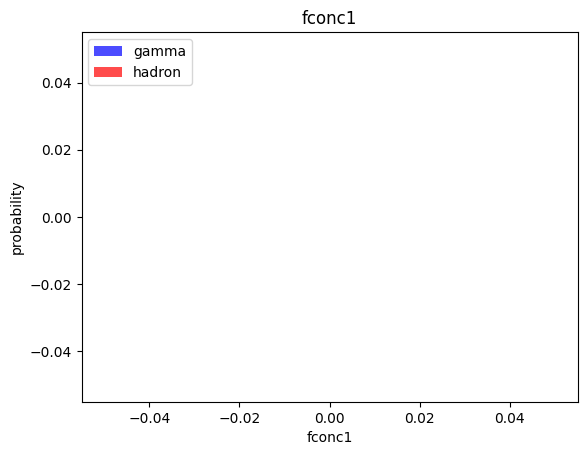

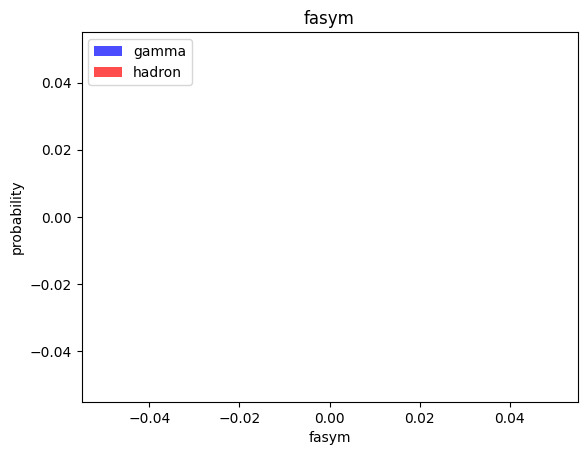

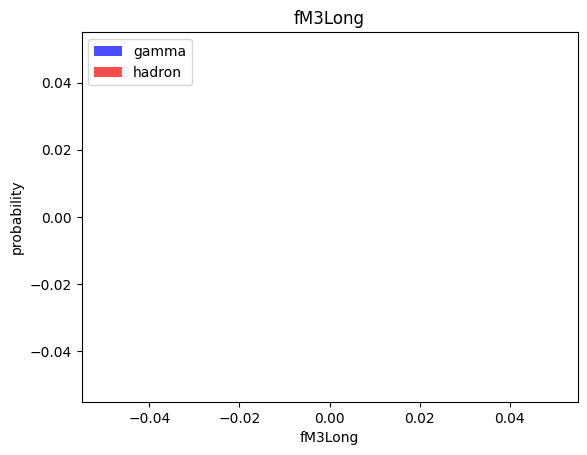

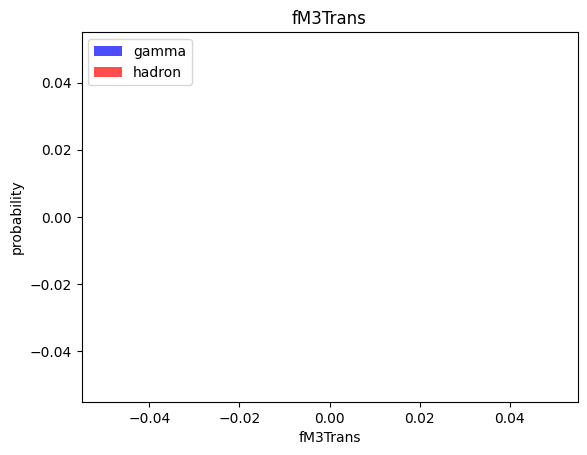

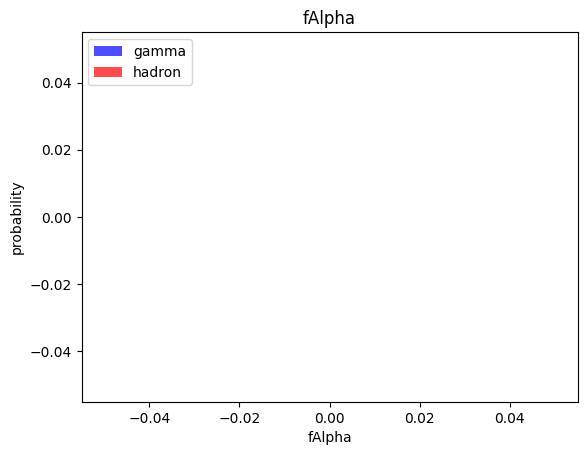

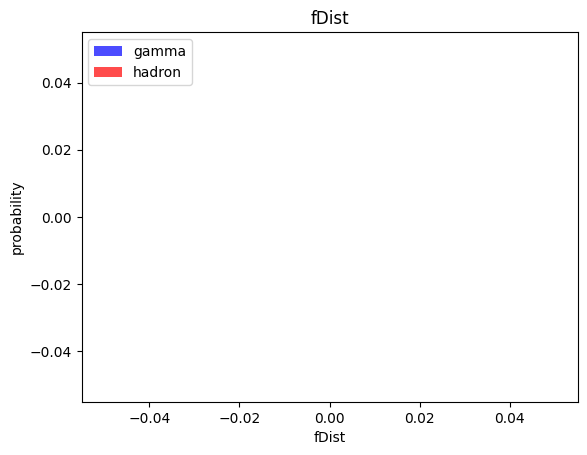

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma',alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron',alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Train, Validation, test datasets**

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False): #Takes a pandas DataFrame and an optional oversample flag (default: False).
   X = dataframe[dataframe.columns[:-1]].values
   y = dataframe[dataframe.columns[-1]].values

   scaler = StandardScaler()  #Standardizes (scales) features: Mean = 0, standard deviation = 1 This improves model performance.
   X = scaler.fit_transform(X)
   if oversample:
     ros = RandomOverSampler()
     X, y = ros.fit_resample(X, y)


   data = np.hstack((X, np.reshape(y, (-1, 1))))
   return data, X, y

In [ ]:
print(scale_dataset(valid, oversample=False))


None


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

**KNN
**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # summary of precision, recall, f1-score, and support for each class — helping you evaluate model performance.



In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5) #5 nearest neighbors in the training data and assigns the most common label among them.
knn_model.fit(X_train, y_train) #This trains (fits) the KNN model on your training data X_train (features) and y_train (labels).

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test) # This predicts labels for the test set X_test using the trained KNN model and stores the predicted labels in y_pred.

In [ ]:
print(classification_report(y_test, y_pred)) #This prints a report comparing the true labels (y_test) and the predicted labels (y_pred).

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1349
           1       0.85      0.86      0.85      2455

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      1349
           1       0.73      0.91      0.81      2455

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1349
           1       0.84      0.82      0.83      2455

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1349
           1       0.88      0.90      0.89      2455

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

